# Quantum Machine Learning
## Day 4: Ideas Of Quantum Computing and Quantum SVM

### Group Member:

- Philipp Fukas
- Christopher Gundler
- Farina Kock
- Jonas Rebstadt
- Chris Stenkamp

### 1. Which set of gates are necessary to perform rotations?

#### 1.1 Which set of gates is necessary for classical computation?

In classical computation we only have the possibilty to express states by 0 and 1. To perform necessary operations, we have to be able to invert single bits and to combine them. 
For the inversion of a bit, we introduce the *NOT*-gate and for combination of bits a *CNOT*-gate. In order to illustrate these states, we can point to one of the two accessible states 0 or 1 in the Bloch sphere. 

In [27]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute
from qiskit.tools.visualization import circuit_drawer
from qiskit import Aer
import numpy as np
from math import pi
from qiskit.tools.visualization import plot_histogram, plot_state

In [6]:
def state_2_rho(state):
    return np.outer(state, state.conj())

In [12]:
def get_rho_superposition(number_of_qubits):
    q = QuantumRegister(number_of_qubits)
    c = ClassicalRegister(number_of_qubits)

    qc = QuantumCircuit(q, c)
    qc.x(q[0])

    # execute the quantum circuit 
    backend = Aer.get_backend('statevector_simulator')
    job = execute(qc, backend)
    state_superposition = job.result().get_statevector(qc)
    rho_superposition=state_2_rho(state_superposition)
    return rho_superposition

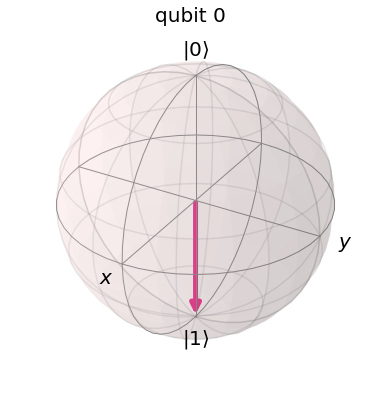

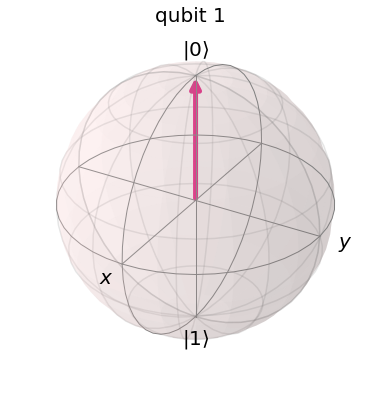

In [17]:
rho_superposition = get_rho_superposition(2)
plot_state(rho_superposition,'bloch')

#### 1.2 Which set of gates is necessary for probabilistic computation?

In order to calculate on a probabilistic machine, the *NOT*- and *CNOT*-gate are not sufficient anymore. Additionally, we need to introduce states between 0 and 1 with a 50% chance to be either or. The so called *Hadamard* transformation is able to put a state into this inbetween state (*superposition*). We call the corresponding gate *H*-gate. The resulting 4 states are visualised below. 

In [25]:
def get_rho_superposition(number_of_qubits):
    q = QuantumRegister(number_of_qubits)
    c = ClassicalRegister(number_of_qubits)

    qc = QuantumCircuit(q, c)
    qc.x(q[0])
    qc.h(q[0])
    qc.x(q[2])
    qc.h(q[1])

    # execute the quantum circuit 
    backend = Aer.get_backend('statevector_simulator')
    job = execute(qc, backend)
    state_superposition = job.result().get_statevector(qc)
    rho_superposition=state_2_rho(state_superposition)
    return rho_superposition

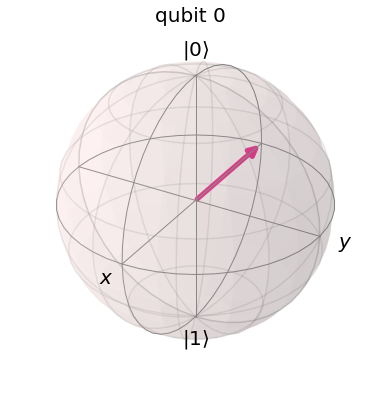

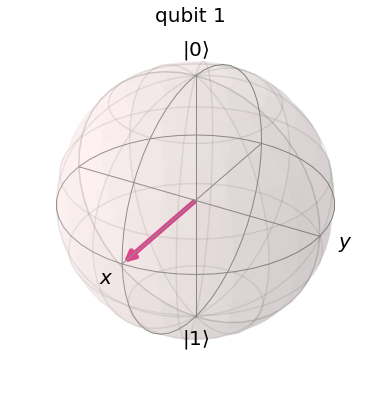

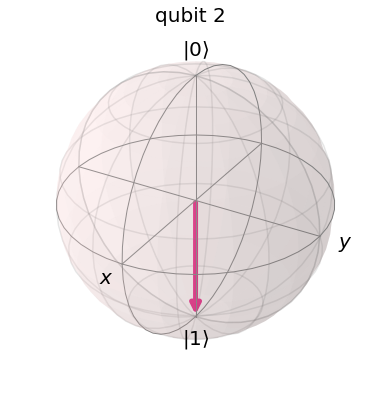

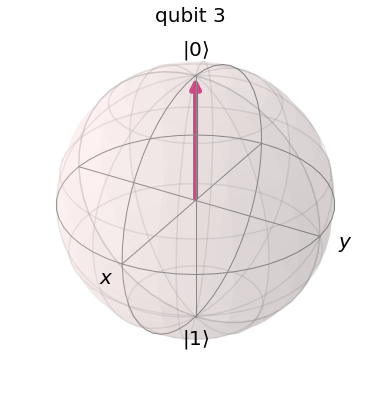

In [26]:
rho_superposition = get_rho_superposition(4)
plot_state(rho_superposition,'bloch')

#### 1.3 Which set of gates is necessary for quantum computation?

In Quantum computing, we do not only want to be able to describe all the states with a 50% probability to be 0 or 1, but moreover we want to model all probabilities that lie between 0 and 1. This can be realised in quantum computing by using phaseshift gates. In the following we will show you a few example states on the Bloch sphere. 

In [36]:
def get_rho_superposition(number_of_qubits):
    q = QuantumRegister(number_of_qubits)
    c = ClassicalRegister(number_of_qubits)

    qc = QuantumCircuit(q, c)
    qc.ry(pi/4, q[1])
    qc.ry(pi/2, q[2])
    qc.ry(3*pi/4, q[3])
    qc.ry(pi, q[4])
    qc.ry(5*pi/4, q[5])
    qc.ry(3*pi/2, q[6])
    qc.ry(7*pi/4, q[7])

    # execute the quantum circuit 
    backend = Aer.get_backend('statevector_simulator')
    job = execute(qc, backend)
    state_superposition = job.result().get_statevector(qc)
    rho_superposition=state_2_rho(state_superposition)
    return rho_superposition

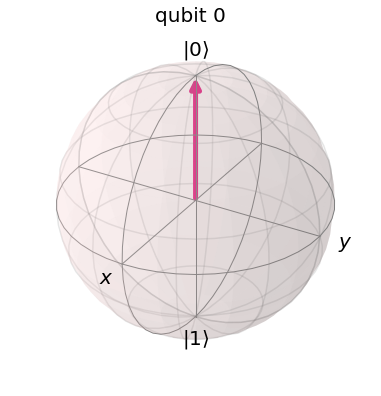

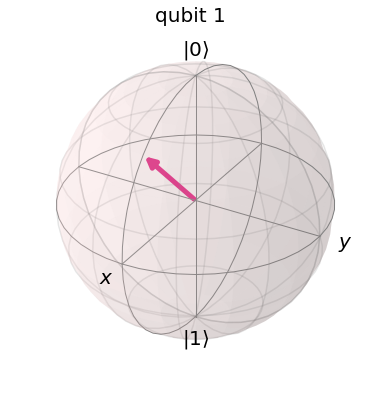

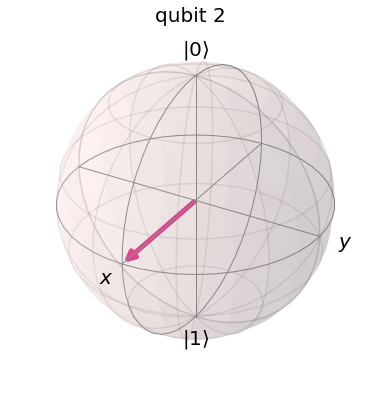

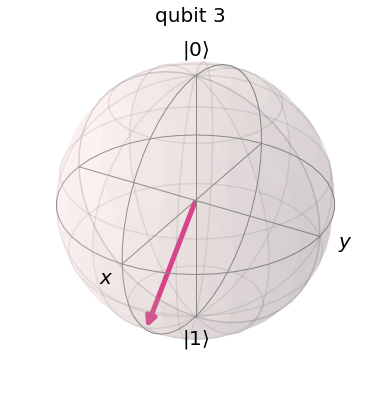

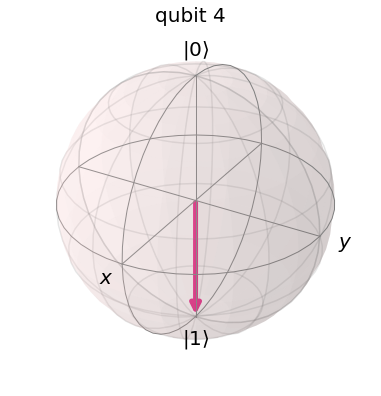

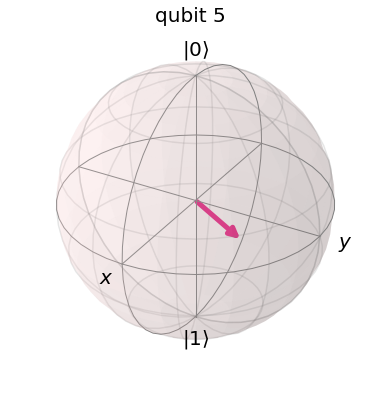

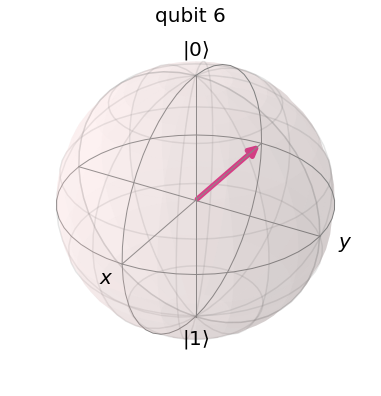

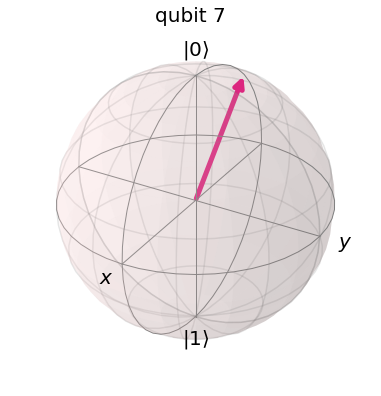

In [37]:
rho_superposition = get_rho_superposition(8)
plot_state(rho_superposition,'bloch')

#### 1.4 How can arbitrary rotations be described?

We can see that in order to perform arbitrary rotations on a Bloch sphere, three gates are essential: *CNOT*, *Hadamard* and *Phaseshift*. With the help of these three operations we can rotate any initial state to any other state on the Bloch sphere.

### 2. Playing around with Support Vector Machine (SVM)

SVMs are a commonly used tool for a variety of tasks in Data Mining and Artificial Intelligence. In classical implementation, the algorithm for a training suffers from a complexity of $O(M^2(M+N))$, where $N$ is the number of features and $M$ the number of samples. Quantum computers may allow a far more effective procedure in an overall complexity of $O(\log(M*N))$ (Source: https://peterwittek.com/understanding-quantum-svms.html).

In order of evaluating the current state of development, SciKit was utilized as a source of differently distributed 2D samples.

In [ ]:
%matplotlib notebook

import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt
from matplotlib import colors, cm

def visualize(data, n_classes = 2, color = "seismic"):
    scaler = colors.Normalize(vmin=0, vmax=n_classes - 1)
    colormap = plt.get_cmap(color)
    mapper = cm.ScalarMappable(norm=scaler, cmap=colormap)

    for i, (inputs, outputs) in enumerate(data):
        title = "Dataset {}".format(i + 1)
        figure = plt.figure(title)
        plt.scatter(inputs[:, 0], inputs[:, 1], c=[mapper.to_rgba(output) for output in outputs])
    plt.plot()

def convert_dataset(inputs, outputs, training_split = 0.9):
    training = {}
    testing = {}
    
    labels = np.unique(outputs)
    for label in labels:
        data = inputs[np.where(outputs == label)]
        split = int(training_split * len(data))
        training[label] = data[:split]
        testing[label] = data[split:]
        
    return training, testing

NUM_SAMPLES = 100
data = [
    datasets.make_blobs(n_samples=NUM_SAMPLES, n_features=2, centers=2),
    datasets.make_circles(n_samples=NUM_SAMPLES, noise=0.03),
    datasets.make_moons(n_samples=NUM_SAMPLES, noise=0.08)
]

visualize(data)

While classical implementations are able to process thousands of samples, the simulation of the quantum algorithm suffers from serious performance problems. Given the high amount of optimized parameters and ways of further optimization, we do not compare it directly to specialized implementations. Nevertheless, the performance even on the demanding second and third dataset showed the potential of the technology in the future.

In [ ]:
from qiskit_aqua import run_algorithm

params_two_class = {
    'problem': {'name': 'svm_classification', 'random_seed': 10598},
    'algorithm': {
        'name': 'QSVM.Kernel'
    },
    'backend': {'name': 'qasm_simulator', 'shots': 1024},
    'feature_map': {'name': 'SecondOrderExpansion', 'depth': 2, 'entanglement': 'linear'}
}

for i, (inputs, outputs) in enumerate(data):
    training_input, testing_input = convert_dataset(inputs, outputs, 0.8)    
    
    algo_input = get_input_instance('SVMInput')
    algo_input.training_dataset  = training_input
    algo_input.test_dataset = testing_input
    
    result = run_algorithm(params_two_class, algo_input)
    print("Dataset {}: {}%".format(i + 1, result['testing_accuracy']))